In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)
my_datasets = (noisy_circles, noisy_moons, varied, aniso, blobs, no_structure)

In [4]:
def make_scatterplot(X, y, ax):
    if y is None:
        sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax)
    else:
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', ax=ax)
        ax.legend().remove()

In [10]:
from sklearn.preprocessing import MinMaxScaler

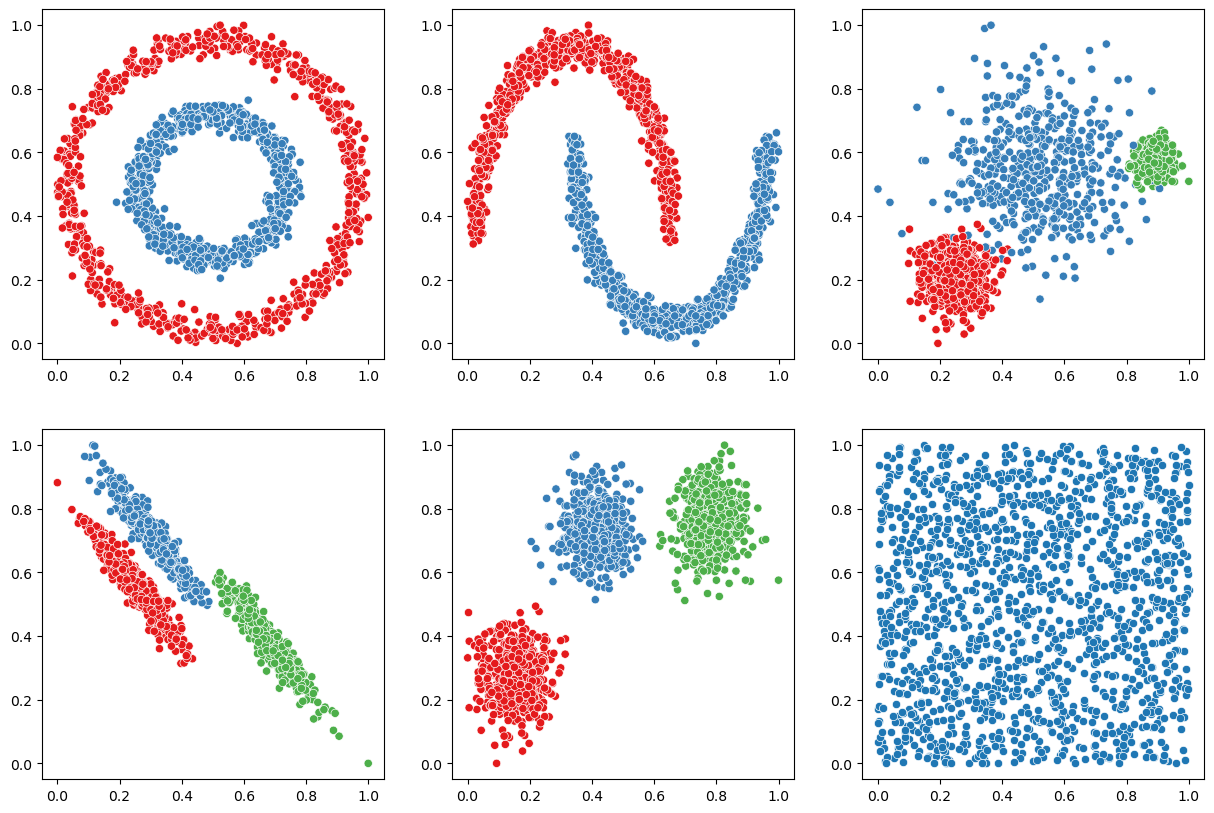

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.reshape(-1)
for i, (X, y) in enumerate(my_datasets):
    X_scaled = MinMaxScaler().fit_transform(X)
    make_scatterplot(X_scaled, y, axs[i])

In [12]:
linkages = ['single', 'average', 'complete', 'ward']

In [13]:
from sklearn.cluster import AgglomerativeClustering

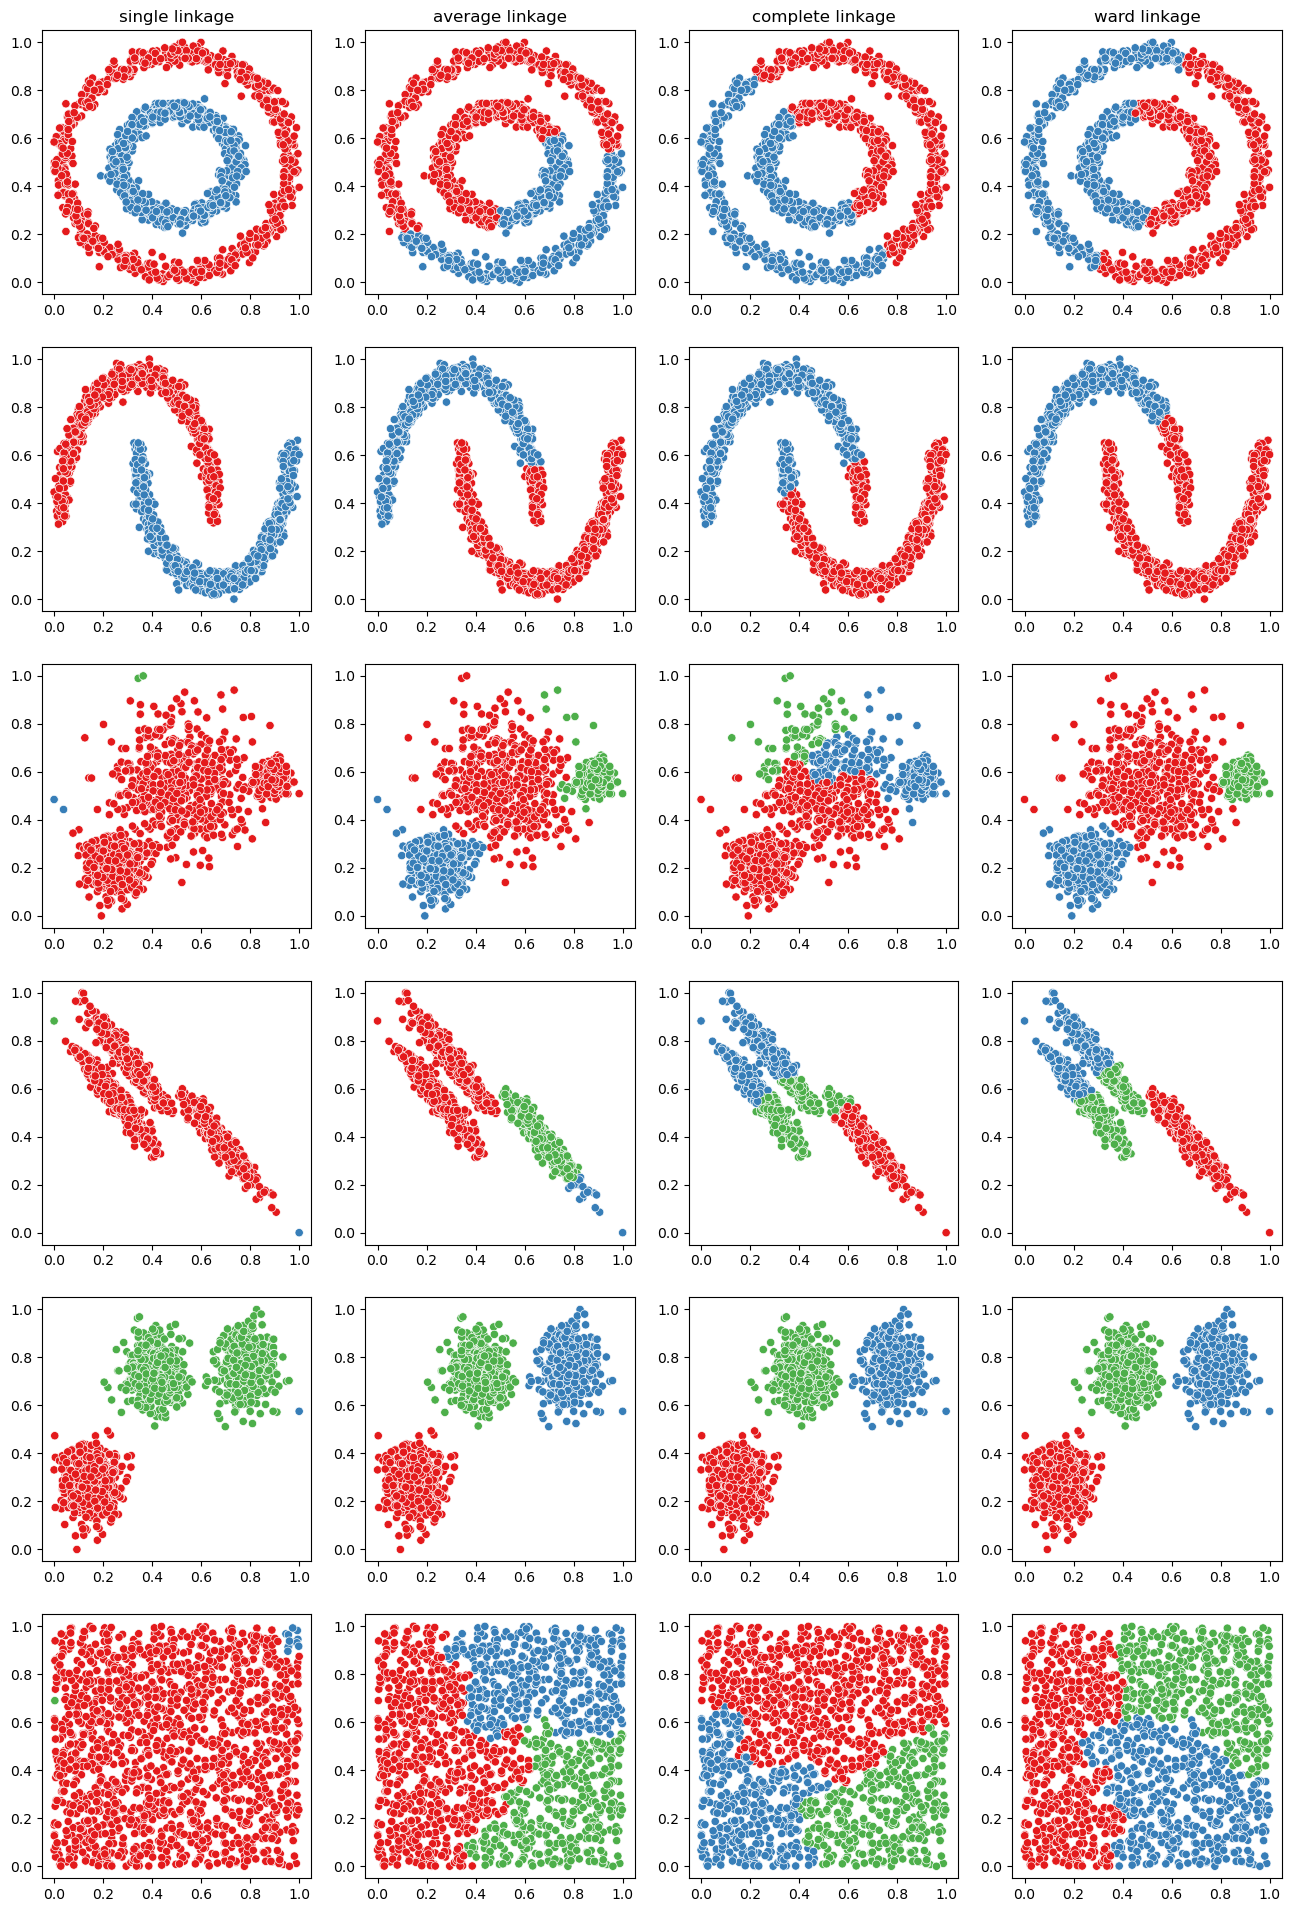

In [15]:
fig, axs = plt.subplots(nrows=len(my_datasets), ncols=len(linkages), figsize=(16, 24))
for i, (X, y) in enumerate(my_datasets):
    for j, linkage in enumerate(linkages):
        n_clusters = 2 if i < 2 else 3
        X_scaled = MinMaxScaler().fit_transform(X)
        y_pred = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X_scaled)
        make_scatterplot(X_scaled, y_pred, axs[i][j])

for i, ax in enumerate(axs[0]):
    ax.set_title(f'{linkages[i]} linkage')

In [16]:
# We can see that ward linkage is best, and could do better upon enforcing connectivity constraints